# Connect to Drive to Access Training and Testing Data

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd '/content/drive/My Drive/UF Courses/MTG7396-Topological-Data-Analysis'

/content/drive/My Drive/UF Courses/MTG7396-Topological-Data-Analysis


In [0]:
%ls

BN_DNN_Accuracy_Simple.png
BN_DNN_Loss_Simple.png
Complex-TDA-Data/
NN-models/
Preprocess-Images-Color-Mask.ipynb
Simple-TDA-Data/
TDA-Presentation/
TDA-Project-Complex.R
TDA-Project-Simple.R
TDA-Skin-Cancer-Complex-Sampled-Data-and-Plots.zip
TDA-Skin-Cancer-Simple-Sampled-Data-and-Plots.zip


# Connect to GPU for Training Neural Network

This code checks that tensorflow is set up to work with GPU.

Note: To connect to GPU, select Edit->Notebook Settings->Hardware Accellerator->GPU to have access to GPU for training neural network.

In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# Import Additional Packages Necessary for Training and Testing Neural Network

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow import keras
import seaborn as sns
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

# User Defined Functions Used In Notebook

Here we define a function for plotting training/testing accuracy and objective function value over the training process.

In [0]:
# Function to generate plot of training/testing value/accuracy
def train_test_val_acc_plot(history):
  #-----------------------------------------------------------
  # Retrieve a list of list results on training and test data
  # sets for each training epoch
  #-----------------------------------------------------------
  acc=history.history['acc']
  val_acc=history.history['val_acc']
  loss=history.history['loss']
  val_loss=history.history['val_loss']

  epochs=range(len(acc)) # Get number of epochs

  #------------------------------------------------
  # Plot training and validation accuracy per epoch
  #------------------------------------------------
  plt.plot(epochs, acc, 'r')
  plt.plot(epochs, val_acc, 'b')
  plt.title('Training and validation accuracy')
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(["Accuracy", "Validation Accuracy"])

  plt.figure()

  #------------------------------------------------
  # Plot training and validation loss per epoch
  #------------------------------------------------
  plt.plot(epochs, loss, 'r')
  plt.plot(epochs, val_loss, 'b')
  plt.title('Training and validation loss')
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend(["Loss", "Validation Loss"])

  plt.figure()

# Load Training and Testing Data

In [0]:
simple_death_vector_data_fname = "Simple-TDA-Data/Simple-DV-Data-Vietoris-Rips.csv"
simple_persistence_landscape_data_fname = "Simple-TDA-Data/Simple-PL-Data-Vietoris-Rips.csv"

complex_death_vector_data_fname = "Complex-TDA-Data/Complex-DV-Data.csv"
complex_persistence_landscape_data_fname = "Complex-TDA-Data/Complex-PL-Data.csv"

### Simple Sampling Method: Death Vector and Persistence Landscape Data

In [0]:
# Import death vector data, separate strings into columns, convert to floats
df_dv = pd.read_csv(simple_death_vector_data_fname, header=None)
df_dv = df_dv[0].str.split(' ', expand=True).astype(float)
df_dv.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198
0,0.163299,0.163299,0.155039,0.155039,0.145196,0.145196,0.141421,0.141421,0.137318,0.137318,0.137318,0.137318,0.137318,0.137318,0.122095,0.122095,0.122095,0.122095,0.122095,0.122095,0.122095,0.122095,0.122095,0.122095,0.122095,0.122095,0.122095,0.122095,0.122095,0.122095,0.115470,0.115470,0.115470,0.115470,0.097098,0.097098,0.097098,0.097098,0.097098,0.097098,...,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165
1,0.245702,0.230940,0.217119,0.211474,0.206610,0.205338,0.201375,0.200000,0.197162,0.182574,0.172668,0.172668,0.172668,0.172668,0.168179,0.165793,0.165793,0.165793,0.165793,0.165793,0.165793,0.165793,0.165793,0.165793,0.163299,0.163299,0.155039,0.155039,0.137318,0.137318,0.137318,0.137318,0.137318,0.137318,0.122095,0.122095,0.122095,0.122095,0.122095,0.122095,...,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165
2,0.348791,0.200000,0.184373,0.184373,0.182574,0.172668,0.172668,0.172668,0.172668,0.172668,0.172668,0.168179,0.165793,0.165793,0.165793,0.165793,0.165793,0.163299,0.163299,0.163299,0.163299,0.155039,0.155039,0.155039,0.155039,0.145196,0.145196,0.145196,0.145196,0.141421,0.137318,0.137318,0.137318,0.137318,0.137318,0.137318,0.137318,0.137318,0.137318,0.137318,...,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165
3,0.301125,0.273012,0.237841,0.231837,0.230940,0.225326,0.219258,0.219258,0.216025,0.211474,0.206610,0.201375,0.200000,0.197162,0.197162,0.184373,0.182574,0.182574,0.182574,0.168179,0.168179,0.168179,0.168179,0.168179,0.165793,0.165793,0.163299,0.155039,0.155039,0.155039,0.155039,0.155039,0.155039,0.155039,0.155039,0.155039,0.155039,0.155039,0.155039,0.155039,...,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165
4,0.258199,0.244189,0.211474,0.206610,0.205338,0.205338,0.201375,0.201375,0.197162,0.197162,0.194197,0.182574,0.172668,0.168179,0.168179,0.165793,0.165793,0.165793,0.163299,0.163299,0.163299,0.155039,0.145196,0.145196,0.145196,0.145196,0.137318,0.137318,0.137318,0.137318,0.137318,0.137318,0.137318,0.137318,0.137318,0.137318,0.122095,0.122095,0.122095,0.122095,...,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165


In [0]:
# Import death vector data, separate strings into columns, convert to floats
df_dv = pd.read_csv(simple_death_vector_data_fname, header=None)
df_dv = df_dv[0].str.split(' ', expand=True).astype(float)
df_dv.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198
0,0.013333,0.013333,0.012019,0.012019,0.010541,0.010541,0.010000,0.010000,0.009428,0.009428,0.009428,0.009428,0.009428,0.009428,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.006667,0.006667,0.006667,0.006667,0.004714,0.004714,0.004714,0.004714,0.004714,0.004714,...,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333
1,0.030185,0.026667,0.023570,0.022361,0.021344,0.021082,0.020276,0.020000,0.019437,0.016667,0.014907,0.014907,0.014907,0.014907,0.014142,0.013744,0.013744,0.013744,0.013744,0.013744,0.013744,0.013744,0.013744,0.013744,0.013333,0.013333,0.012019,0.012019,0.009428,0.009428,0.009428,0.009428,0.009428,0.009428,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,...,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333
2,0.060828,0.020000,0.016997,0.016997,0.016667,0.014907,0.014907,0.014907,0.014907,0.014907,0.014907,0.014142,0.013744,0.013744,0.013744,0.013744,0.013744,0.013333,0.013333,0.013333,0.013333,0.012019,0.012019,0.012019,0.012019,0.010541,0.010541,0.010541,0.010541,0.010000,0.009428,0.009428,0.009428,0.009428,0.009428,0.009428,0.009428,0.009428,0.009428,0.009428,...,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333
3,0.045338,0.037268,0.028284,0.026874,0.026667,0.025386,0.024037,0.024037,0.023333,0.022361,0.021344,0.020276,0.020000,0.019437,0.019437,0.016997,0.016667,0.016667,0.016667,0.014142,0.014142,0.014142,0.014142,0.014142,0.013744,0.013744,0.013333,0.012019,0.012019,0.012019,0.012019,0.012019,0.012019,0.012019,0.012019,0.012019,0.012019,0.012019,0.012019,0.012019,...,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333
4,0.033333,0.029814,0.022361,0.021344,0.021082,0.021082,0.020276,0.020276,0.019437,0.019437,0.018856,0.016667,0.014907,0.014142,0.014142,0.013744,0.013744,0.013744,0.013333,0.013333,0.013333,0.012019,0.010541,0.010541,0.010541,0.010541,0.009428,0.009428,0.009428,0.009428,0.009428,0.009428,0.009428,0.009428,0.009428,0.009428,0.007454,0.007454,0.007454,0.007454,...,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333


In [0]:
df_dv.shape

(120, 199)

In [0]:
# Import persistence landscape data, separate strings into columns, convert to floats
df_pl = pd.read_csv(simple_persistence_landscape_data_fname, header=None)
df_pl = df_pl[0].str.split(' ', expand=True).astype(float)
df_pl.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,30060,30061,30062,30063,30064,30065,30066,30067,30068,30069,30070,30071,30072,30073,30074,30075,30076,30077,30078,30079,30080,30081,30082,30083,30084,30085,30086,30087,30088,30089,30090,30091,30092,30093,30094,30095,30096,30097,30098,30099
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001684,0.005017,0.007098,0.003765,0.000432,0.00000,0.000000,0.000000,0.00000,0.000000,0.001197,0.002095,0.001239,0.004572,0.007905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001684,0.005017,0.007098,0.003765,0.000432,0.00000,0.000000,0.000000,0.00000,0.000000,0.001197,0.002095,0.001239,0.004572,0.007905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001684,0.005017,0.007098,0.003765,0.000432,0.00000,0.000000,0.000000,0.00000,0.000000,0.001197,0.002095,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001684,0.005017,0.007098,0.003765,0.000432,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001684,0.005017,0.008350,0.011684,0.015017,0.01547,0.012137,0.008803,0.00547,0.002137,0.001197,0.004530,0.007863,0.011197,0.011421,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
df_pl.shape

(120, 30100)

### Complex Sampling Method: Death Vector and Persistence Landscape Data

In [0]:
# Import death vector data, separate strings into columns, convert to floats
df_dv_complex = pd.read_csv(complex_death_vector_data_fname, header=None)
df_dv_complex = df_dv_complex[0].str.split(' ', expand=True).astype(float)
df_dv_complex.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198
0,0.010541,0.010541,0.010541,0.010000,0.010000,0.010000,0.009428,0.009428,0.009428,0.009428,0.009428,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,...,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333
1,0.013333,0.010541,0.010541,0.010000,0.009428,0.009428,0.009428,0.009428,0.009428,0.009428,0.009428,0.009428,0.009428,0.009428,0.009428,0.009428,0.009428,0.009428,0.009428,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,...,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333
2,0.023333,0.021082,0.021082,0.020276,0.020276,0.020276,0.020000,0.019437,0.019437,0.018856,0.018856,0.018856,0.017951,0.017951,0.017951,0.017951,0.016997,0.016997,0.016997,0.016997,0.016997,0.016997,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.014907,0.014907,0.014907,0.014907,0.014907,0.014907,0.014907,0.014907,0.014907,0.014907,0.014907,...,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.004714,0.004714,0.004714,0.004714,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333
3,0.017951,0.017951,0.017951,0.016997,0.016997,0.016997,0.016997,0.016997,0.016997,0.016997,0.016997,0.016997,0.016997,0.016997,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.014907,0.014907,0.014907,0.014907,0.014907,0.014907,0.014907,0.014907,0.014907,0.014907,0.014907,0.014907,0.014142,0.014142,0.013744,0.013744,0.013744,...,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.004714,0.004714,0.004714,0.004714,0.004714,0.004714,0.004714,0.004714,0.004714,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333
4,0.025386,0.024267,0.024037,0.024037,0.023570,0.023333,0.023333,0.021344,0.021344,0.021082,0.020276,0.020276,0.020000,0.020000,0.019437,0.019437,0.019437,0.018856,0.017951,0.017951,0.017951,0.017951,0.017951,0.017951,0.017951,0.016997,0.016997,0.016997,0.016997,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,...,0.009428,0.009428,0.009428,0.009428,0.009428,0.009428,0.009428,0.009428,0.009428,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.004714,0.004714,0.004714,0.004714,0.003333,0.003333,0.003333,0.003333


In [0]:
df_dv_complex.shape

(80, 199)

In [0]:
# Import persistence landscape data, separate strings into columns, convert to floats
df_pl_complex = pd.read_csv(simple_persistence_landscape_data_fname, header=None)
df_pl_complex = df_pl_complex[0].str.split(' ', expand=True).astype(float)
df_pl_complex.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,30060,30061,30062,30063,30064,30065,30066,30067,30068,30069,30070,30071,30072,30073,30074,30075,30076,30077,30078,30079,30080,30081,30082,30083,30084,30085,30086,30087,30088,30089,30090,30091,30092,30093,30094,30095,30096,30097,30098,30099
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001684,0.005017,0.007098,0.003765,0.000432,0.00000,0.000000,0.000000,0.00000,0.000000,0.001197,0.002095,0.001239,0.004572,0.007905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001684,0.005017,0.007098,0.003765,0.000432,0.00000,0.000000,0.000000,0.00000,0.000000,0.001197,0.002095,0.001239,0.004572,0.007905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001684,0.005017,0.007098,0.003765,0.000432,0.00000,0.000000,0.000000,0.00000,0.000000,0.001197,0.002095,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001684,0.005017,0.007098,0.003765,0.000432,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001684,0.005017,0.008350,0.011684,0.015017,0.01547,0.012137,0.008803,0.00547,0.002137,0.001197,0.004530,0.007863,0.011197,0.011421,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
df_pl_complex.shape

(120, 30100)

### Data Labels

In [0]:
# First 40 points are from one class and last 40 points are from another class
y = np.zeros(80, dtype=int)
y[40:] = 1

# Minor Data Preprocessing Before Providing to Neural Network

Note: The topological data analysis preprocessing (determining death vectors and persistence landscapes) was done in RStudio prior to loading the data in this notebook. Here we are performing the following minimal preprocessing so that the data is in a suitable format for the neural network:

* Concatenating the death vector and persistence landscape data for each image in the data set

### Perform Training and Testing Split

In [0]:
# Death Vector Training and Testing Data Split
X_train, X_test, y_train, y_test = train_test_split(df_dv.drop(range(80,120)), y, test_size=0.2, random_state=42)

In [0]:
# Inspect training and testing data
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198
73,0.329432,0.238663,0.237841,0.234467,0.231837,0.228185,0.201375,0.197162,0.194197,0.184373,0.172668,0.172668,0.172668,0.172668,0.172668,0.165793,0.165793,0.165793,0.165793,0.165793,0.165793,0.163299,0.163299,0.163299,0.155039,0.155039,0.155039,0.155039,0.155039,0.145196,0.145196,0.137318,0.137318,0.137318,0.137318,0.137318,0.137318,0.137318,0.137318,0.122095,...,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165
61,0.294827,0.266210,0.211474,0.201375,0.200000,0.200000,0.189476,0.168179,0.155039,0.155039,0.155039,0.155039,0.155039,0.155039,0.155039,0.155039,0.155039,0.155039,0.155039,0.155039,0.155039,0.155039,0.155039,0.155039,0.155039,0.155039,0.155039,0.155039,0.155039,0.155039,0.155039,0.155039,0.145196,0.145196,0.145196,0.145196,0.145196,0.145196,0.145196,0.145196,...,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165
55,0.237841,0.234467,0.228185,0.211474,0.206610,0.205338,0.201375,0.197162,0.189476,0.182574,0.182574,0.172668,0.172668,0.172668,0.172668,0.172668,0.168179,0.168179,0.165793,0.165793,0.165793,0.165793,0.165793,0.165793,0.165793,0.163299,0.163299,0.163299,0.155039,0.155039,0.145196,0.145196,0.137318,0.137318,0.137318,0.137318,0.137318,0.137318,0.137318,0.137318,...,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165
40,0.234467,0.234467,0.231837,0.216025,0.197162,0.189476,0.182574,0.172668,0.172668,0.172668,0.168179,0.168179,0.165793,0.165793,0.165793,0.165793,0.165793,0.163299,0.163299,0.163299,0.155039,0.155039,0.145196,0.141421,0.137318,0.137318,0.137318,0.137318,0.137318,0.137318,0.137318,0.137318,0.137318,0.137318,0.137318,0.137318,0.137318,0.137318,0.137318,0.122095,...,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165
9,0.244949,0.163299,0.145196,0.141421,0.137318,0.137318,0.122095,0.122095,0.122095,0.122095,0.122095,0.122095,0.122095,0.122095,0.122095,0.122095,0.122095,0.115470,0.115470,0.115470,0.115470,0.115470,0.097098,0.097098,0.097098,0.097098,0.097098,0.097098,0.097098,0.097098,0.097098,0.097098,0.097098,0.097098,0.097098,0.097098,0.097098,0.097098,0.097098,0.097098,...,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165,0.08165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [0]:
# Persistence Landscape Training and Testing Data Split
X_train_pl, X_test_pl, y_train_pl, y_test_pl = train_test_split(df_pl.drop(range(80,120)), y, test_size=0.2, random_state=42)

In [0]:
# Inspect training and testing persistence landscape data
X_train_pl

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,30060,30061,30062,30063,30064,30065,30066,30067,30068,30069,30070,30071,30072,30073,30074,30075,30076,30077,30078,30079,30080,30081,30082,30083,30084,30085,30086,30087,30088,30089,30090,30091,30092,30093,30094,30095,30096,30097,30098,30099
73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001684,0.005017,0.007098,0.003765,0.000432,0.002902,0.006235,0.009568,0.012095,0.008761,0.005428,0.002095,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001684,0.005017,0.007098,0.003765,0.000432,0.002902,0.006235,0.008803,0.005470,0.002137,0.001197,0.002095,0.001239,0.004572,0.007905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001684,0.005017,0.007098,0.003765,0.000432,0.002902,0.006235,0.008803,0.005470,0.002137,0.000000,0.000000,0.001239,0.004572,0.007905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001684,0.005017,0.007098,0.003765,0.000432,0.002902,0.006235,0.009568,0.012095,0.008761,0.005428,0.002095,0.001239,0.004572,0.007905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001684,0.005017,0.008350,0.011684,0.015017,0.015470,0.012137,0.008803,0.005470,0.002137,0.001197,0.002095,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001684,0.005017,0.008350,0.011684,0.015017,0.015470,0.012137,0.009568,0.012095,0.008761,0.005428,0.002095,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001684,0.005017,0.007098,0.003765,0.000432,0.000000,0.000000,0.000000,0.000000,0.000000,0.001197,0.002095,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001684,0.005017,0.007098,0.003765,0.000432,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [0]:
# Death Vector Training and Testing Data Split
X_train_complex, X_test_complex, y_train_complex, y_test_complex = train_test_split(df_dv_complex, y, test_size=0.2, random_state=42)

In [0]:
X_train_complex.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198
73,0.138002,0.029814,0.027487,0.026874,0.026874,0.026034,0.024267,0.024037,0.023570,0.023570,0.023570,0.022361,0.022361,0.021344,0.021082,0.021082,0.020276,0.020276,0.020276,0.020276,0.020000,0.020000,0.020000,0.020000,0.019437,0.019437,0.019437,0.019437,0.019437,0.019437,0.018856,0.018856,0.018856,0.018856,0.018856,0.017951,0.017951,0.017951,0.017951,0.017951,...,0.007454,0.007454,0.007454,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.004714,0.004714,0.004714,0.004714,0.004714,0.004714,0.004714,0.003333,0.003333,0.003333
61,0.026874,0.023570,0.023570,0.023570,0.022361,0.022361,0.021082,0.020276,0.020276,0.020276,0.020276,0.020000,0.020000,0.020000,0.019437,0.019437,0.019437,0.019437,0.019437,0.019437,0.019437,0.019437,0.019437,0.019437,0.018856,0.018856,0.018856,0.018856,0.017951,0.017951,0.016997,0.016997,0.016997,0.016667,0.016667,0.016667,0.016667,0.016667,0.014907,0.014907,...,0.010000,0.010000,0.009428,0.009428,0.009428,0.009428,0.009428,0.009428,0.009428,0.009428,0.009428,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.007454,0.006667,0.006667,0.006667,0.006667,0.004714,0.004714,0.004714,0.004714,0.004714,0.004714,0.004714,0.004714,0.003333,0.003333,0.003333,0.003333,0.003333
55,0.022361,0.021082,0.020276,0.019437,0.019437,0.017951,0.017951,0.017951,0.017951,0.017951,0.017951,0.016997,0.016997,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.014907,0.014907,0.014907,0.014907,0.014907,0.014907,0.014907,0.014907,0.014142,0.014142,0.014142,0.013744,0.013744,0.013744,0.013744,0.013744,0.013744,0.013744,0.013744,...,0.007454,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.004714,0.004714,0.004714,0.004714,0.004714,0.004714,0.004714,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333
40,0.113235,0.068718,0.027487,0.021344,0.020000,0.019437,0.017951,0.017951,0.017951,0.016997,0.016997,0.016997,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.014907,0.014907,0.014907,0.014907,0.014907,0.014907,0.014907,0.014907,0.014142,0.014142,0.014142,0.014142,0.014142,0.013744,0.013744,0.013744,0.013744,0.013744,0.013744,0.013744,0.013744,0.013744,...,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.004714,0.004714,0.004714,0.004714,0.004714,0.004714,0.004714,0.004714,0.004714,0.004714,0.004714,0.004714,0.004714,0.004714,0.004714,0.004714,0.004714,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333
9,0.013744,0.013744,0.012019,0.012019,0.012019,0.012019,0.010541,0.010541,0.010541,0.010541,0.010541,0.010541,0.010541,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.009428,0.009428,0.009428,0.009428,0.009428,0.009428,0.009428,0.009428,0.009428,0.009428,0.009428,0.009428,0.009428,0.009428,0.009428,0.009428,0.009428,0.009428,...,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333,0.003333


### Normalizing Columns of the Data

In [0]:
# Combine training and testing into single data frame (training on top of testing)
X = pd.concat([X_train, X_test], axis=0)
# Use sklearn StandardScaler funciton to rescale data
scaler = preprocessing.StandardScaler()
X_scaler = scaler.fit_transform(X)
# Separate training and testing data
slice_point = X_train.shape[0]
X_train_scaler = X_scaler[:slice_point]
X_test_scaler = X_scaler[slice_point:]

In [0]:
X_train_scaler

array([[ 1.58901351,  0.27977603,  0.77966994, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.80366429,  0.97338932,  0.03394797, ...,  0.        ,
         0.        ,  0.        ],
       [-0.2998336 ,  0.18076416,  0.49640374, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.28560161,  0.18076416, -0.127044  , ...,  0.        ,
         0.        ,  0.        ],
       [-1.1445286 , -1.15036751, -1.10250626, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.79435647,  1.15632122,  1.08779164, ...,  0.        ,
         0.        ,  0.        ]])

In [0]:
# Copy original data before normalizing
X_train_norm = X_train
X_test_norm = X_test

# Perform min max normalization of certain columns of data
X_train_norm[norm_columns] = (X_train_norm[norm_columns] - X_train_norm[norm_columns].min())/(X_train_norm[norm_columns].max() - X_train_norm[norm_columns].min())
X_test_norm[norm_columns] = (X_test_norm[norm_columns] - X_test_norm[norm_columns].min())/(X_test_norm[norm_columns].max() - X_test_norm[norm_columns].min())

# Set Up Neural Network Model

In [0]:
# Set training and testing data and labels
training_data = X_train
test_data = X_test
training_labels = y_train
test_labels= y_test

# Set persistence landscape training and testing data and labels
pl_training_data = X_train_pl
pl_test_data = X_test_pl
pl_training_labels = y_train_pl
pl_test_labels= y_test_pl

# Set training and testing data and labels from complex sampled death vector data
complex_training_data = X_train_complex
complex_test_data = X_test_complex
complex_training_labels = y_train_complex
complex_test_labels= y_test_complex

In [0]:
# Set training and testing data and labels
# Subsample part of data for quick training of neural network to see if it is suitable architecture before training on full training set
#training_data = X_train_new[:300000]
#test_data = X_test_new[:50000]
training_data = X_train_scaler #[:300000]
test_data = X_test_scaler #[:50000]
training_labels = y_train #[:300000]
test_labels= y_test #[:50000]

# Experimenting with dropping visitNumber
#training_data = training_data.drop(columns=['visitNumber'])
#test_data = test_data.drop(columns=['visitNumber'])

# Model With Batch Normalization

### Network for Simple Death Vector Data

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 398)               79600     
_________________________________________________________________
batch_normalization_57 (Batc (None, 398)               1592      
_________________________________________________________________
activation_57 (Activation)   (None, 398)               0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 398)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 199)               79401     
_________________________________________________________________
batch_normalization_58 (Batc (None, 199)               796       
_________________________________________________________________
activation_58 (Activation)   (None, 199)             

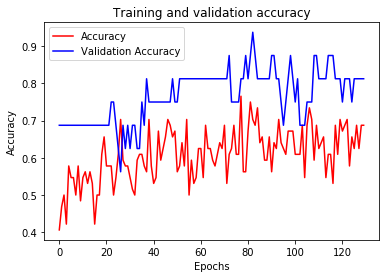

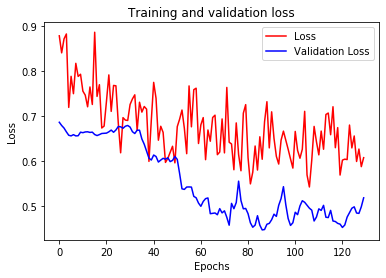

<Figure size 432x288 with 0 Axes>

In [0]:
# Extract input_dim for neural network from shape of data (number of columns)
input_dim = training_data.shape[1]
# Set batch size
batch_size = 5
# Set number of epochs for training
num_epochs = 130
# Specify learning rate for custom optimizer
lr=0.0001
# Specify optimizer to use in training
custom_sgd = tf.keras.optimizers.SGD(lr=lr, decay=1e-6, momentum=0.95, nesterov=True)
custom_adam = tf.keras.optimizers.Adam(learning_rate=lr, beta_1=0.88, beta_2=0.997, epsilon=1e-6)
default_adam='adam'
default_sgd='sgd'

# Model for DNN with two hidden layers
BN_DNN_model = tf.keras.Sequential()

# Input Layer
BN_DNN_model.add(tf.keras.layers.Dense(2 * input_dim, input_dim=input_dim))
BN_DNN_model.add(tf.keras.layers.BatchNormalization())
BN_DNN_model.add(tf.keras.layers.Activation('relu'))
BN_DNN_model.add(tf.keras.layers.Dropout(0.2))

# Hidden Layer
BN_DNN_model.add(tf.keras.layers.Dense(input_dim))
BN_DNN_model.add(tf.keras.layers.BatchNormalization())
BN_DNN_model.add(tf.keras.layers.Activation('relu'))
BN_DNN_model.add(tf.keras.layers.Dropout(0.4))

# Hidden Layer
BN_DNN_model.add(tf.keras.layers.Dense(36))
BN_DNN_model.add(tf.keras.layers.BatchNormalization())
BN_DNN_model.add(tf.keras.layers.Activation('relu'))
BN_DNN_model.add(tf.keras.layers.Dropout(0.4))

# Output layer
BN_DNN_model.add(tf.keras.layers.Dense(1))
BN_DNN_model.add(tf.keras.layers.BatchNormalization())
BN_DNN_model.add(tf.keras.layers.Activation('sigmoid'))

# Callback for reducing learning rate when loss not decreasing
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.1, 
    patience=5, 
    min_lr=0.00005)

# Compile multilayer DNN model
BN_DNN_model.compile(
    loss='binary_crossentropy',
    optimizer=custom_adam,
    metrics=['acc']
)
# Print summary of multilayer DNN model
BN_DNN_model.summary()

# Train model (training multilayer DNN model)
BN_DNN_history = BN_DNN_model.fit(
    training_data, 
    training_labels, 
    epochs=num_epochs, 
    validation_data=(test_data, test_labels),
    batch_size=batch_size,
    callbacks=[reduce_lr],
    verbose=2
)

print("Training Complete")

# Generate plot of training/testing value/accuracy
train_test_val_acc_plot(BN_DNN_history)

In [0]:
# Save the weights
BN_DNN_model.save_weights('NN-models/BN_DNN_model_Simple_Vietoris_Rips')

In [0]:
# GOOD Saved Model for Vietoris Rips Complex Data
# Extract input_dim for neural network from shape of data (number of columns)
input_dim = training_data.shape[1]
# Set batch size
batch_size = 5
# Set number of epochs for training
num_epochs = 120
# Specify learning rate for custom optimizer
lr=0.0001
# Specify optimizer to use in training
custom_sgd = tf.keras.optimizers.SGD(lr=lr, decay=1e-6, momentum=0.95, nesterov=True)
custom_adam = tf.keras.optimizers.Adam(learning_rate=lr, beta_1=0.88, beta_2=0.997, epsilon=1e-6)
default_adam='adam'
default_sgd='sgd'

# Model for DNN with two hidden layers
BN_DNN_model = tf.keras.Sequential()

# Input Layer
BN_DNN_model.add(tf.keras.layers.Dense(2 * input_dim, input_dim=input_dim))
BN_DNN_model.add(tf.keras.layers.BatchNormalization())
BN_DNN_model.add(tf.keras.layers.Activation('relu'))
BN_DNN_model.add(tf.keras.layers.Dropout(0.2))

# Hidden Layer
BN_DNN_model.add(tf.keras.layers.Dense(input_dim))
BN_DNN_model.add(tf.keras.layers.BatchNormalization())
BN_DNN_model.add(tf.keras.layers.Activation('relu'))
BN_DNN_model.add(tf.keras.layers.Dropout(0.4))

# Hidden Layer
BN_DNN_model.add(tf.keras.layers.Dense(36))
BN_DNN_model.add(tf.keras.layers.BatchNormalization())
BN_DNN_model.add(tf.keras.layers.Activation('relu'))
BN_DNN_model.add(tf.keras.layers.Dropout(0.4))

# Output layer
BN_DNN_model.add(tf.keras.layers.Dense(1))
BN_DNN_model.add(tf.keras.layers.BatchNormalization())
BN_DNN_model.add(tf.keras.layers.Activation('sigmoid'))

# Callback for reducing learning rate when loss not decreasing
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.1, 
    patience=5, 
    min_lr=0.00005)

# Compile multilayer DNN model
BN_DNN_model.compile(
    loss='binary_crossentropy',
    optimizer=custom_adam,
    metrics=['acc']
)
# Print summary of multilayer DNN model
BN_DNN_model.summary()

# Train model (training multilayer DNN model)
BN_DNN_history = BN_DNN_model.fit(
    training_data, 
    training_labels, 
    epochs=num_epochs, 
    validation_data=(test_data, test_labels),
    batch_size=batch_size,
    callbacks=[reduce_lr],
    verbose=2
)

print("Training Complete")

# Generate plot of training/testing value/accuracy
train_test_val_acc_plot(BN_DNN_history)

In [0]:
# GOOD Saved Model for alphaComplexDiag Data
# Extract input_dim for neural network from shape of data (number of columns)
input_dim = training_data.shape[1]
# Set batch size
batch_size = 30
# Set number of epochs for training
num_epochs = 300
# Specify learning rate for custom optimizer
lr=0.001
# Specify optimizer to use in training
custom_sgd = tf.keras.optimizers.SGD(lr=lr, decay=1e-6, momentum=0.95, nesterov=True)
custom_adam = tf.keras.optimizers.Adam(learning_rate=lr, beta_1=0.88, beta_2=0.997, epsilon=1e-6)
default_adam='adam'
default_sgd='sgd'

# Model for DNN with two hidden layers
BN_DNN_model = tf.keras.Sequential()

# Input Layer
BN_DNN_model.add(tf.keras.layers.Dense(2 * input_dim, input_dim=input_dim))
BN_DNN_model.add(tf.keras.layers.BatchNormalization())
BN_DNN_model.add(tf.keras.layers.Activation('relu'))
BN_DNN_model.add(tf.keras.layers.Dropout(0.2))

# Hidden Layer
BN_DNN_model.add(tf.keras.layers.Dense(36))
BN_DNN_model.add(tf.keras.layers.BatchNormalization())
BN_DNN_model.add(tf.keras.layers.Activation('relu'))
BN_DNN_model.add(tf.keras.layers.Dropout(0.4))

# Output layer
BN_DNN_model.add(tf.keras.layers.Dense(1))
BN_DNN_model.add(tf.keras.layers.BatchNormalization())
BN_DNN_model.add(tf.keras.layers.Activation('sigmoid'))

# Callback for reducing learning rate when loss not decreasing
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.1, 
    patience=5, 
    min_lr=0.00005)

# Compile multilayer DNN model
BN_DNN_model.compile(
    loss='binary_crossentropy',
    optimizer=custom_sgd,
    metrics=['acc']
)
# Print summary of multilayer DNN model
BN_DNN_model.summary()

# Train model (training multilayer DNN model)
BN_DNN_history = BN_DNN_model.fit(
    training_data, 
    training_labels, 
    epochs=num_epochs, 
    validation_data=(test_data, test_labels),
    batch_size=batch_size,
    callbacks=[reduce_lr],
    verbose=2
)

print("Training Complete")

# Generate plot of training/testing value/accuracy
train_test_val_acc_plot(BN_DNN_history)

### Neural Network for Persistence Landscape Data

In [0]:
# Perform min max normalization of data (results in terrible performance)
#pl_training_data = (pl_training_data - pl_training_data.min())/(pl_training_data.max() - pl_training_data.min())
#pl_test_data = (pl_test_data - pl_test_data.min())/(pl_test_data.max() - pl_test_data.min())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 100)               3010100   
_________________________________________________________________
batch_normalization_34 (Batc (None, 100)               400       
_________________________________________________________________
activation_34 (Activation)   (None, 100)               0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 50)                5050      
_________________________________________________________________
batch_normalization_35 (Batc (None, 50)                200       
_________________________________________________________________
activation_35 (Activation)   (None, 50)              

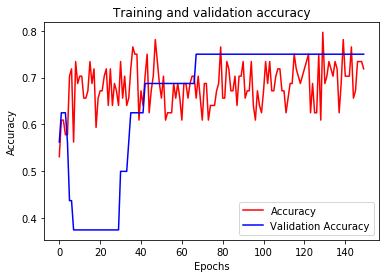

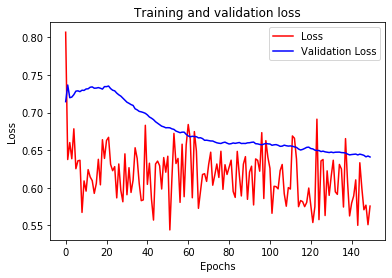

<Figure size 432x288 with 0 Axes>

In [0]:
# GOOD model for Simple PL data with Vietoris-Rips Complex
# Extract input_dim for neural network from shape of data (number of columns)
input_dim = pl_training_data.shape[1]
# Set batch size
batch_size = 8
# Set number of epochs for training
num_epochs = 150
# Specify learning rate for custom optimizer
lr=0.01
# Specify optimizer to use in training
custom_sgd = tf.keras.optimizers.SGD(lr=lr, decay=1e-6, momentum=0.95, nesterov=True)
custom_adam = tf.keras.optimizers.Adam(learning_rate=lr, beta_1=0.88, beta_2=0.997, epsilon=1e-6)
default_adam='adam'
default_sgd='sgd'

# Model for DNN with two hidden layers
PL_BN_DNN_model = tf.keras.Sequential()

# Input Layer
PL_BN_DNN_model.add(tf.keras.layers.Dense(100, input_dim=input_dim))
PL_BN_DNN_model.add(tf.keras.layers.BatchNormalization())
PL_BN_DNN_model.add(tf.keras.layers.Activation('relu'))
PL_BN_DNN_model.add(tf.keras.layers.Dropout(0.4))

# Hidden Layer
PL_BN_DNN_model.add(tf.keras.layers.Dense(50))
PL_BN_DNN_model.add(tf.keras.layers.BatchNormalization())
PL_BN_DNN_model.add(tf.keras.layers.Activation('relu'))
PL_BN_DNN_model.add(tf.keras.layers.Dropout(0.4))

# Output layer
PL_BN_DNN_model.add(tf.keras.layers.Dense(1))
PL_BN_DNN_model.add(tf.keras.layers.BatchNormalization())
PL_BN_DNN_model.add(tf.keras.layers.Activation('sigmoid'))

# Callback for reducing learning rate when loss not decreasing
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.1, 
    patience=5, 
    min_lr=0.00005)

# Compile multilayer DNN model
PL_BN_DNN_model.compile(
    loss='binary_crossentropy',
    optimizer=custom_adam,
    metrics=['acc']
)
# Print summary of multilayer DNN model
PL_BN_DNN_model.summary()

# Train model (training multilayer DNN model)
PL_BN_DNN_history = PL_BN_DNN_model.fit(
    pl_training_data, 
    pl_training_labels, 
    epochs=num_epochs, 
    validation_data=(pl_test_data, pl_test_labels),
    batch_size=batch_size,
    callbacks=[reduce_lr],
    verbose=2
)

print("Training Complete")

# Generate plot of training/testing value/accuracy
train_test_val_acc_plot(PL_BN_DNN_history)

In [0]:
# Save the weights
PL_BN_DNN_model.save_weights('NN-models/PL_BN_DNN_model_Simple_Vietoris_Rips')

### Neural Network for Death Vector Data Generated by Sampling Point Cloud with Cluster Algorithm

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 398)               79600     
_________________________________________________________________
batch_normalization_69 (Batc (None, 398)               1592      
_________________________________________________________________
activation_69 (Activation)   (None, 398)               0         
_________________________________________________________________
dropout_51 (Dropout)         (None, 398)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 199)               79401     
_________________________________________________________________
batch_normalization_70 (Batc (None, 199)               796       
_________________________________________________________________
activation_70 (Activation)   (None, 199)             

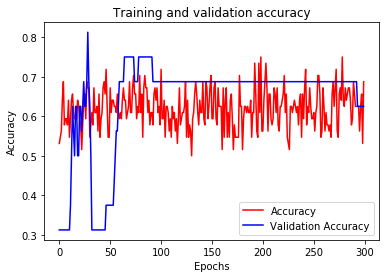

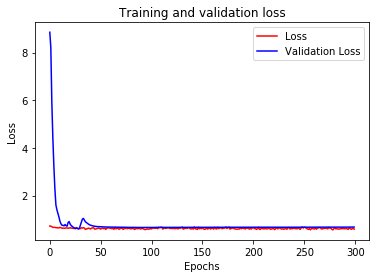

<Figure size 432x288 with 0 Axes>

In [0]:
# GOOD Saved Model
# Extract input_dim for neural network from shape of data (number of columns)
input_dim = complex_training_data.shape[1]
# Set batch size
batch_size = 15
# Set number of epochs for training
num_epochs = 300
# Specify learning rate for custom optimizer
lr=0.05
# Specify optimizer to use in training
custom_sgd = tf.keras.optimizers.SGD(lr=lr, decay=1e-6, momentum=0.95, nesterov=True)
custom_adam = tf.keras.optimizers.Adam(learning_rate=lr, beta_1=0.88, beta_2=0.997, epsilon=1e-6)
default_adam='adam'
default_sgd='sgd'

# Model for DNN with two hidden layers
complex_BN_DNN_model = tf.keras.Sequential()

# Input Layer
complex_BN_DNN_model.add(tf.keras.layers.Dense(2 * input_dim, input_dim=input_dim))
complex_BN_DNN_model.add(tf.keras.layers.BatchNormalization())
complex_BN_DNN_model.add(tf.keras.layers.Activation('relu'))
complex_BN_DNN_model.add(tf.keras.layers.Dropout(0.4))

# Hidden Layer
complex_BN_DNN_model.add(tf.keras.layers.Dense(input_dim, input_dim=input_dim))
complex_BN_DNN_model.add(tf.keras.layers.BatchNormalization())
complex_BN_DNN_model.add(tf.keras.layers.Activation('relu'))
complex_BN_DNN_model.add(tf.keras.layers.Dropout(0.4))

# Hidden Layer
complex_BN_DNN_model.add(tf.keras.layers.Dense(input_dim/2, input_dim=input_dim))
complex_BN_DNN_model.add(tf.keras.layers.BatchNormalization())
complex_BN_DNN_model.add(tf.keras.layers.Activation('relu'))
complex_BN_DNN_model.add(tf.keras.layers.Dropout(0.4))

# Hidden Layer
#complex_BN_DNN_model.add(tf.keras.layers.Dense(36))
#complex_BN_DNN_model.add(tf.keras.layers.BatchNormalization())
#complex_BN_DNN_model.add(tf.keras.layers.Activation('relu'))
#complex_BN_DNN_model.add(tf.keras.layers.Dropout(0.4))

# Output layer
complex_BN_DNN_model.add(tf.keras.layers.Dense(1))
complex_BN_DNN_model.add(tf.keras.layers.BatchNormalization())
complex_BN_DNN_model.add(tf.keras.layers.Activation('sigmoid'))

# Callback for reducing learning rate when loss not decreasing
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.1, 
    patience=5, 
    min_lr=0.00005)

# Compile multilayer DNN model
complex_BN_DNN_model.compile(
    loss='binary_crossentropy',
    optimizer=custom_adam,
    metrics=['acc']
)
# Print summary of multilayer DNN model
complex_BN_DNN_model.summary()

# Train model (training multilayer DNN model)
complex_BN_DNN_history = complex_BN_DNN_model.fit(
    complex_training_data, 
    complex_training_labels, 
    epochs=num_epochs, 
    validation_data=(complex_test_data, complex_test_labels),
    batch_size=batch_size,
    callbacks=[reduce_lr],
    verbose=2
)

print("Training Complete")

# Generate plot of training/testing value/accuracy
train_test_val_acc_plot(complex_BN_DNN_history)